# Boston Challenge - Regression One

## Part One - Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("boston_corrected.csv")

In [2]:
data.head()

,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
data.describe() # count is complete, no missing data

,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,47.531621,2700.357708,-71.056389,42.216440,22.532806,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,27.571401,1380.038110,0.075405,0.061777,9.197104,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.000000,1.000000,-71.289500,42.030000,5.000000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,26.250000,1303.250000,-71.093225,42.180775,17.025000,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,42.000000,3393.500000,-71.052900,42.218100,21.200000,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,78.000000,3739.750000,-71.019625,42.252250,25.000000,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,91.000000,5082.000000,-70.810000,42.381000,50.000000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Part Two - Feature Engineering

In [4]:
columns = list(data.columns)
unused_columns = ["TOWN", "TRACT", "LON", "LAT", "MEDV"]
for col in unused_columns: 
    columns.remove(col)
data = data[columns]

In [5]:
data["CMEDV"].head() # in USD 1000

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: CMEDV, dtype: float64

In [6]:
data["CMEDV"].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

In [7]:
data.head() # all numeric data ready for t-SNE

,TOWNNO,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,2,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
#TODO: do some form of dimensionality reduction with PCA or t-SNE
# from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(data), columns=data.columns)

pca = PCA(n_components=3)
pca.fit_transform(data_scaled)
print(pca.singular_values_)

[58.94017401 28.90008857 28.65442208]


In [9]:
reduced_data = pd.DataFrame(pca.components_, columns=data.columns)
reduced_data.head()

,TOWNNO,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.227456,-0.256171,0.241203,-0.230276,0.322320,-0.005182,0.315941,-0.190777,0.282483,-0.286874,0.307779,0.326087,0.204359,-0.193634,0.298145
1,0.101176,0.471810,-0.012429,-0.072601,0.106893,0.389542,0.231768,0.487963,0.206968,-0.317102,0.101533,0.065915,-0.302695,-0.012271,-0.238584
2,0.458971,0.090844,0.285179,0.397677,-0.111916,-0.150764,-0.132987,0.229329,-0.290040,0.247592,0.357737,0.293200,0.083066,-0.210252,-0.160046


<AxesSubplot:>

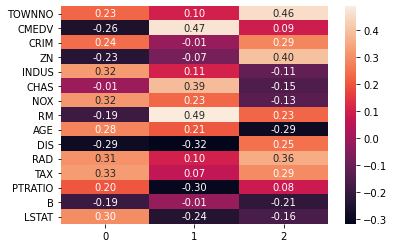

In [10]:
sns.heatmap(reduced_data.T, fmt=".2f", annot=True)

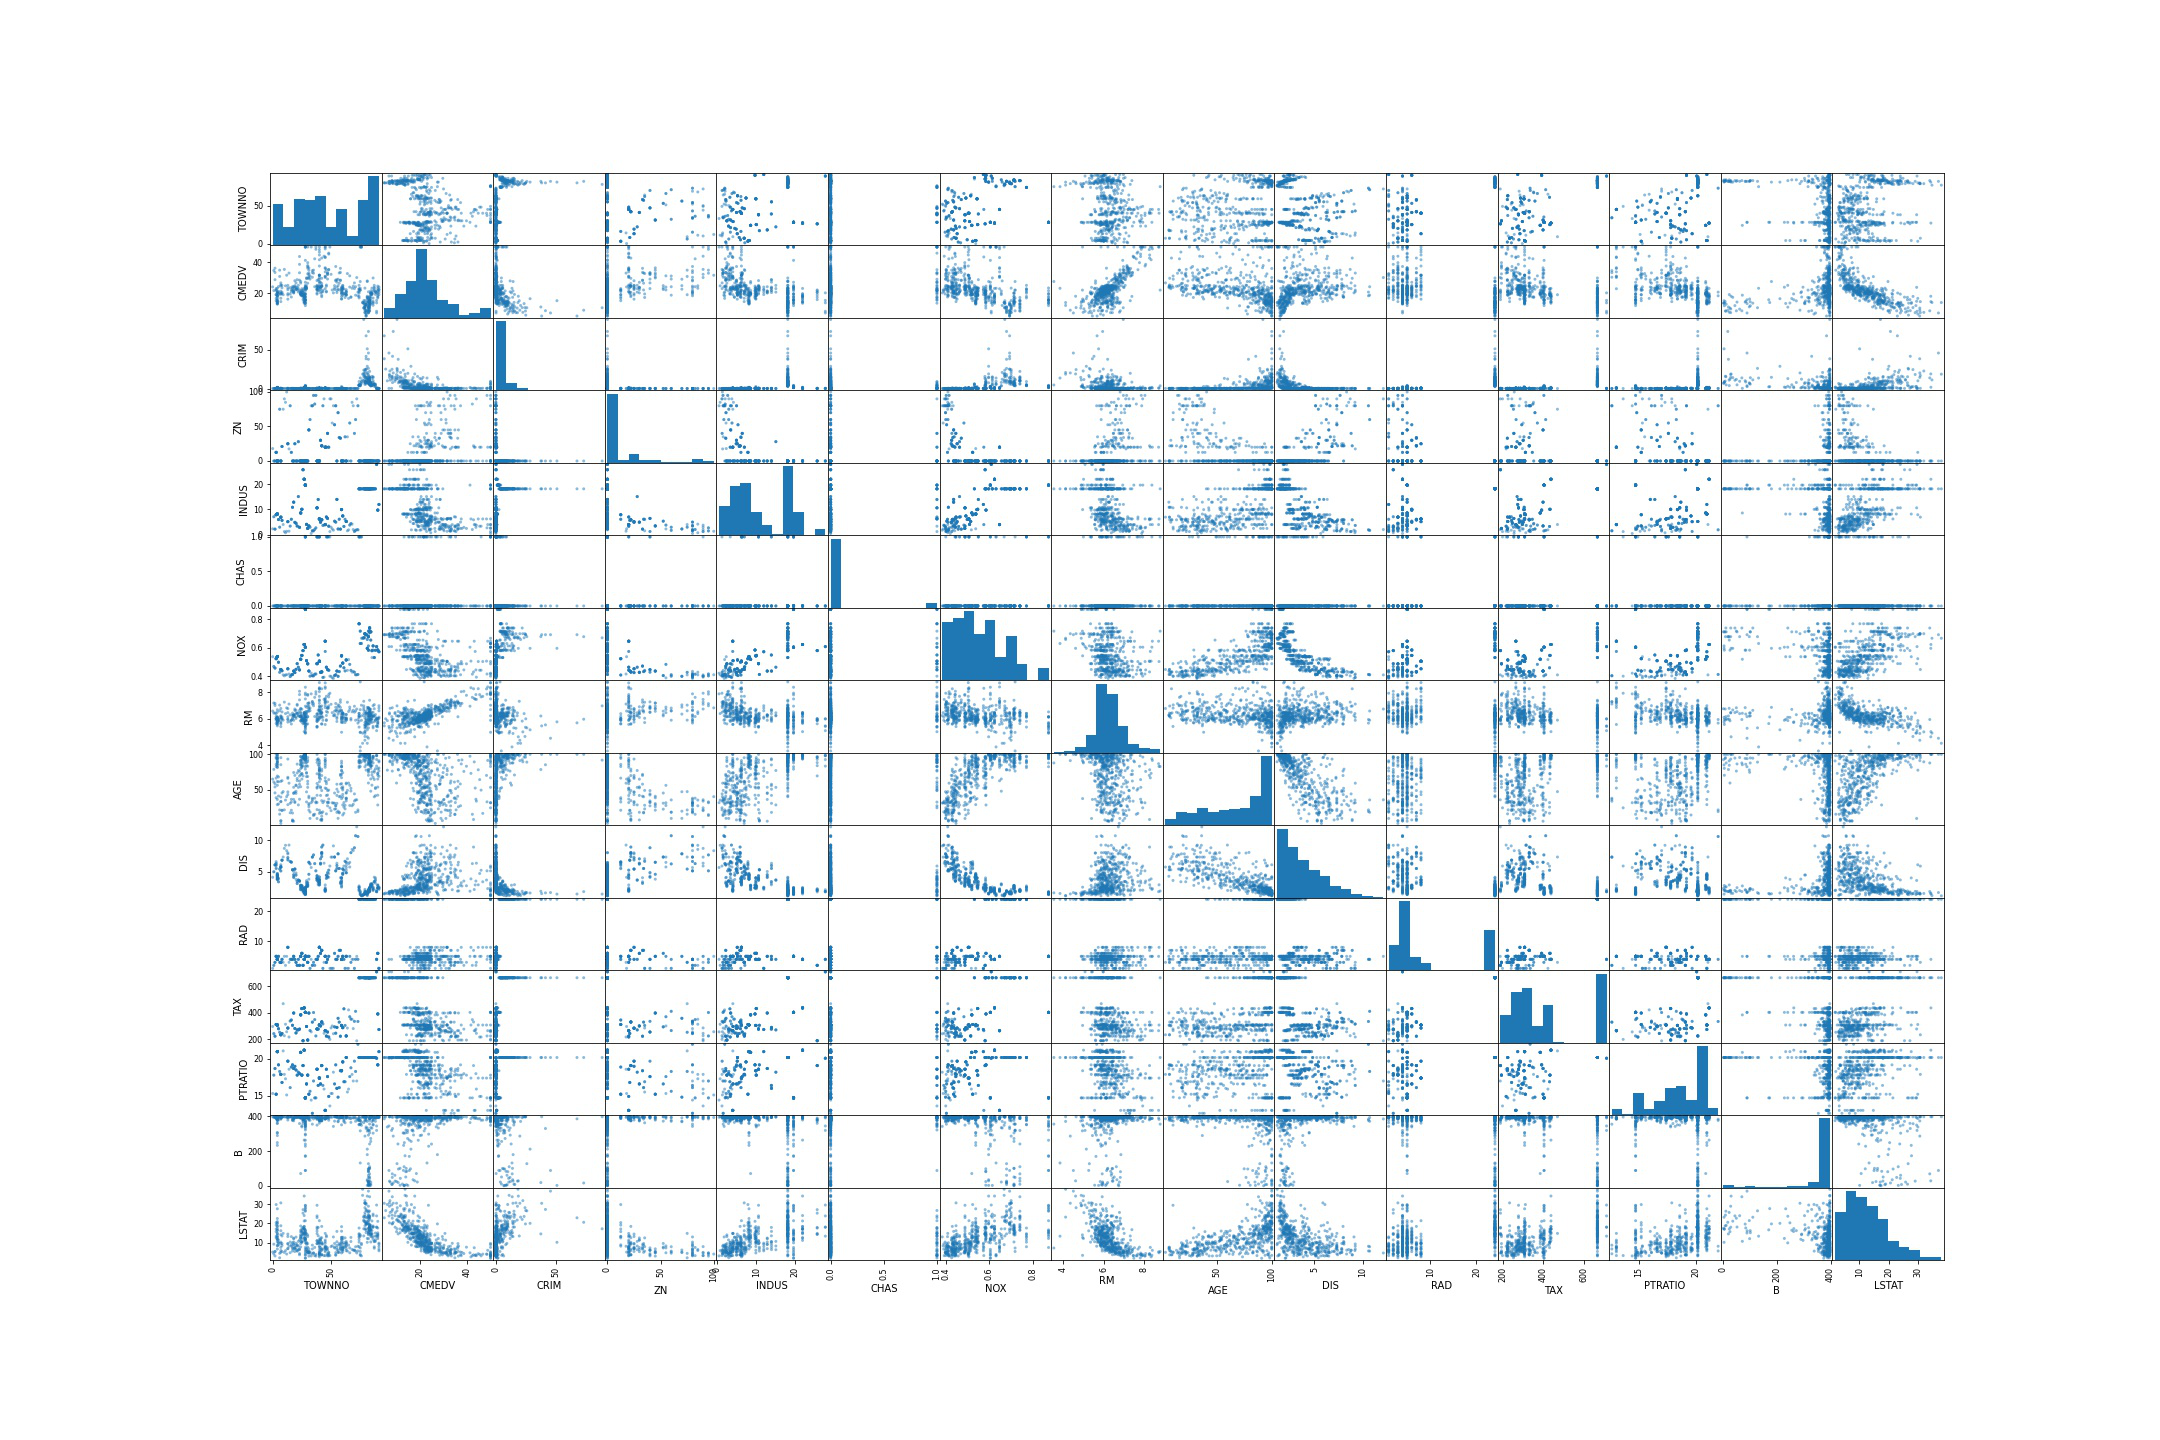

In [11]:
from pandas.plotting import scatter_matrix
from IPython.display import display
from PIL import Image
import os

# all pair plots
if not os.path.exists("out/correlation.jpeg"):
    scatter_matrix(data, figsize=(30, 20))
    plt.savefig("out/correlation.jpeg", )
else:
    img = Image.open("out/correlation.jpeg")
    display(img)

In [12]:
# pair plots with price
for col in data.columns:
    if col != "CMEDV":
        if not os.path.exists(f"out/CMEDV_{col}_correlation.jpeg"):
            scatter_matrix(data[["CMEDV",col]], alpha=0.3)
            plt.savefig(f"out/CMEDV_{col}_correlation.jpeg")

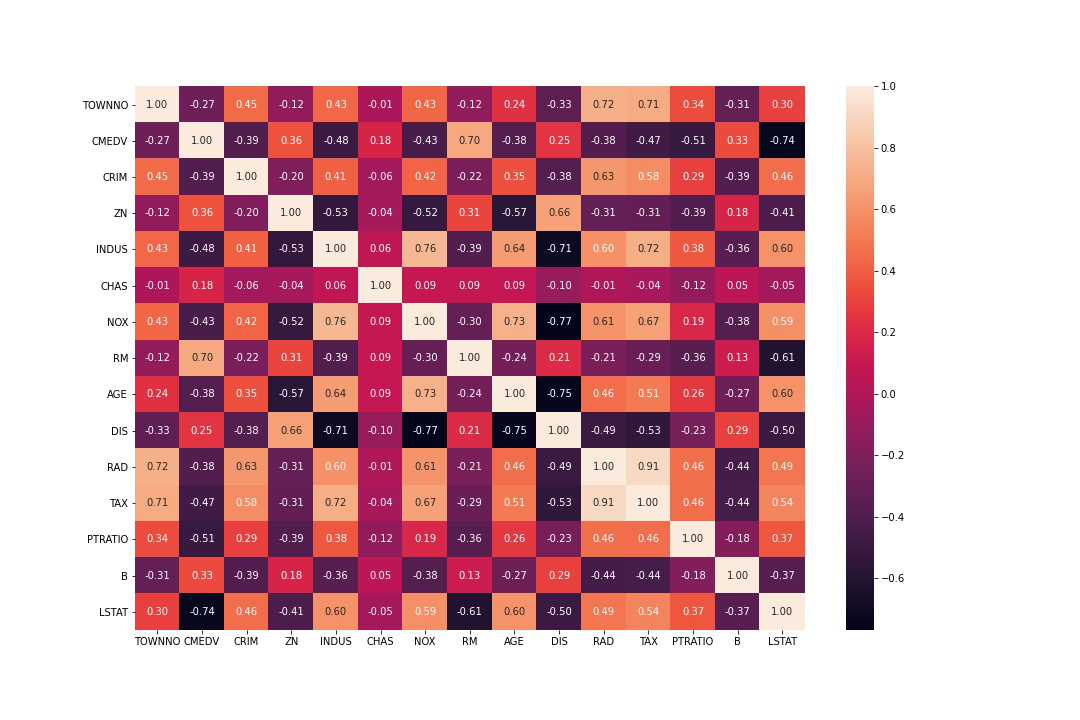

In [13]:
# correlation heatmaps
if not os.path.exists("out/heatmap.jpeg"):
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.savefig("out/heatmap.jpeg")
else:
    img = Image.open("out/heatmap.jpeg")
    display(img)

In [14]:
print(columns)

['TOWNNO', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


## Part Four - Regression

In [15]:
# create a general model tester
# model methods: fit(x, y), predict(x, y)
# metric methods: just call metric and return score
# returns model so can obtain things like parameters
def evaluate_model(model, metric, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    # evaluate with training data
    y_train_predict = model.predict(X_train)
    print(f"Train score: {metric(y_train, y_train_predict)}")

    # evaluate with testing data
    y_test_predict = model.predict(X_test)
    print(f"Test score: {metric(y_test, y_test_predict)}")

    return model

In [16]:
# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

# metrics
from sklearn.metrics import mean_squared_error, r2_score

# processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

array([[<AxesSubplot:title={'center':'TOWNNO'}>,
        <AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

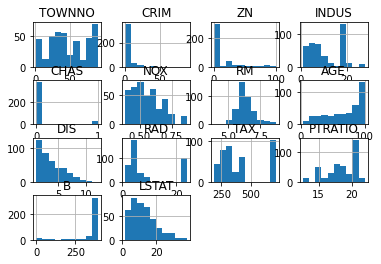

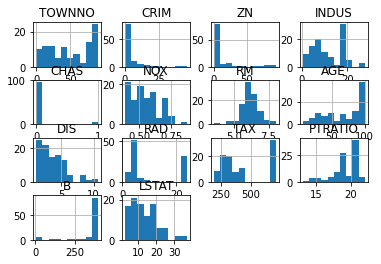

In [17]:
y = data["CMEDV"]
X = data[["TOWNNO", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking to see if the distributions are the same
X_train.hist()
X_test.hist()

In [18]:
# linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Linear regression model with MSE scores")
res = evaluate_model(LinearRegression(), mean_squared_error, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nLinear regression model with R2 scores")
res = evaluate_model(LinearRegression(), r2_score, X_train_scaled, X_test_scaled, y_train, y_test)

Linear regression model with MSE scores
Train score: 21.02580463332367
Test score: 24.673735911592196

Linear regression model with R2 scores
Train score: 0.7566526731195529
Test score: 0.6654148319686843


In [19]:
# xgboost regression
print("XGBoost Regressor model with MSE scores")
res = evaluate_model(XGBRegressor(), mean_squared_error, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nXGBoost Regressor model with R2 scores")
res = evaluate_model(XGBRegressor(), r2_score, X_train_scaled, X_test_scaled, y_train, y_test)

XGBoost Regressor model with MSE scores
Train score: 0.00045658195108066297
Test score: 7.650696942337252

XGBoost Regressor model with R2 scores
Train score: 0.9999947156363699
Test score: 0.8962536629564096


In [20]:
# adaboost regression
print("AdaBoost Regressor model with MSE scores")
res = evaluate_model(AdaBoostRegressor(), mean_squared_error, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nAdaBoost Regressor model with R2 scores")
res = evaluate_model(AdaBoostRegressor(), r2_score, X_train_scaled, X_test_scaled, y_train, y_test)

AdaBoost Regressor model with MSE scores
Train score: 7.846607731128163
Test score: 11.151595061752662

AdaBoost Regressor model with R2 scores
Train score: 0.9088164991351464
Test score: 0.8806737101311796


In [21]:
#catboost regression
print("CatBoost Regressor model with MSE scores")
res = evaluate_model(CatBoostRegressor(logging_level="Silent"), mean_squared_error, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nCatBoost Regressor model with R2 scores")
res = evaluate_model(CatBoostRegressor(logging_level="Silent"), r2_score, X_train_scaled, X_test_scaled, y_train, y_test)

CatBoost Regressor model with MSE scores
Train score: 0.26279782858340583
Test score: 7.727337300158161

CatBoost Regressor model with R2 scores
Train score: 0.9969584446250204
Test score: 0.8952143907889775


In [22]:
# multilayer perceptron regression
print("MLP Regressor model with MSE scores")
res = evaluate_model(MLPRegressor(), mean_squared_error, X_train_scaled, X_test_scaled, y_train, y_test)
print("\nMLP Regressor model with R2 scores")
res = evaluate_model(MLPRegressor(), r2_score, X_train_scaled, X_test_scaled, y_train, y_test)

MLP Regressor model with MSE scores
Train score: 25.590372989544846
Test score: 29.422948079680825

MLP Regressor model with R2 scores
Train score: 0.7424862324179841
Test score: 0.6619115754404041
